# Actividad 9
# 🔍 Parte 1: Análisis de Lagos Argentinos con Python
Objetivo: Repasar manipulación de datos con Pandas e introducir valores nulos y mapas con Folium.



#  La información de nuestros datos 
* ¿Cómo comunicamos la información analizada sobre los datos?
* ¿Cómo conocemos la composición de los datos?
* ¿Qué recursos podemos usar para comunicar los resultados de los análisis?:
    * Cantidad de lagos por provincia.
    * Cantidad de lagos por tamaño.
  

# ✅ Etapa 1: Exploración Básica (10 min)
* Consigna 1: Cargá el dataset y utiliza las operaciones básicas para conocer el contenido del dataset:
* [Lagos Argentinos](https://archivos.linti.unlp.edu.ar/index.php/s/LBNPS7EdmNSwt8z).
    * Nombre del archivo: lagos_arg.csv
    * Descargado de: https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Lagos
* Cantidad de filas y columans
* Nombres de las columnas
* Tipos de datos de las columnas
* Ver las primeras 10 filas del dataset

## La cantidad de filas y columnas del dataset

In [7]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:01:01


In [1]:
import pandas as pd
import plotly.express as px
lagos = pd.read_csv("lagos_arg.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'lagos_arg.csv'

In [2]:
lagos.shape

NameError: name 'lagos' is not defined

## Nombres de las columnas

In [13]:
lagos.columns

Index(['Nombre', 'Ubicación', 'Superficie (km²)', 'Profundidad máxima (m)',
       'Profundidad media (m)', 'Coordenadas', 'Sup Tamaño', 'Latitud en GMS',
       'Longitud en GMS', 'lat', 'lng'],
      dtype='object')

## Tipo de datos de las columnas

In [15]:
lagos.dtypes

Nombre                     object
Ubicación                  object
Superficie (km²)            int64
Profundidad máxima (m)    float64
Profundidad media (m)     float64
Coordenadas                object
Sup Tamaño                 object
Latitud en GMS             object
Longitud en GMS            object
lat                       float64
lng                       float64
dtype: object

## Primeras 10 filas del dataset

In [32]:
lagos.head(10)

0             Santa Cruz
1             Santa Cruz
2    Río Negro / Neuquén
3                 Chubut
4             Santa Cruz
5           Buenos Aires
6              Río Negro
7             Santa Cruz
8                 Chubut
9                Neuquén
Name: Ubicación, dtype: object

# ✅ Etapa 2: Análisis por Provincia (15 min)
* ¿En qué provincias hay lagos?
* Cantidad de Lagos por provincia.
* Gráfico de torta sobre la cantidad de lagos provincia.
* Gráfico de barra sobre la cantidad de lagos provincia.

## Cantidad de Lagos por provincia

In [7]:
provincias = lagos["Ubicación"]
provincias.unique()
cantidadprovincia = provincias.value_counts()
print (cantidadprovincia)

Ubicación
Santa Cruz                                               16
Neuquén                                                  14
Chubut                                                   13
Río Negro                                                 4
Tierra del Fuego, Antártida e Islas del Atlántico Sur     3
Río Negro / Neuquén                                       1
Buenos Aires                                              1
Name: count, dtype: int64


In [40]:
## Gráfico de torta sobre la cantidad de lagos provincia

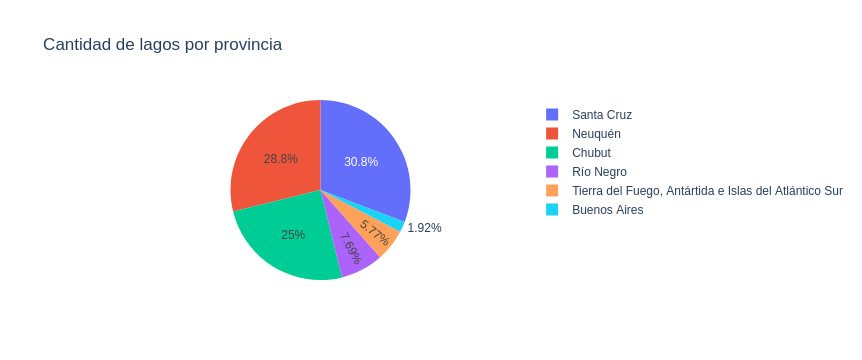

In [26]:
cantidad_por_provincia = lagos["Ubicación"].value_counts().reset_index()
cantidad_por_provincia.columns = ["Provincia", "Cantidad"]
fig = px.pie(cantidad_por_provincia, names="Provincia", values="Cantidad",title="Cantidad de lagos por provincia")
fig.show()

## Gráfico de barra sobre la cantidad de lagos provincia

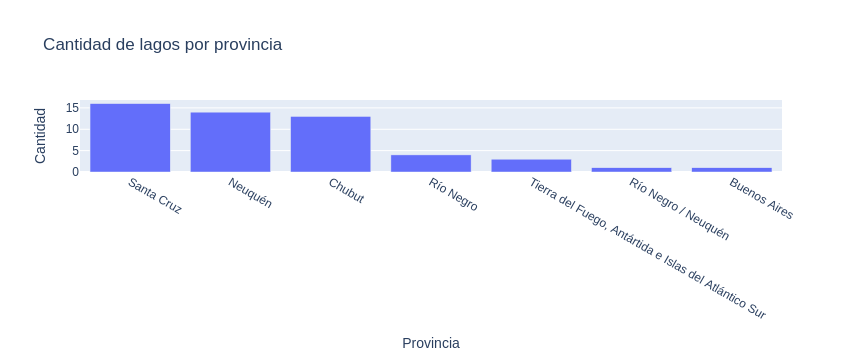

In [16]:
cantidad_por_provincia = lagos["Ubicación"].value_counts().reset_index()
cantidad_por_provincia.columns = ["Provincia", "Cantidad"]
fig = px.bar(cantidad_por_provincia, x="Provincia", y="Cantidad",title="Cantidad de lagos por provincia")
fig.show()

## ¿En qué provincias hay lagos?

In [29]:
print (lagos["Ubicación"].value.count())

AttributeError: 'Series' object has no attribute 'value'

# ✅ Etapa 3: Filtrar y Limpiar Datos (15 min)
* Mostrar los lagos que son de la provincia de Neuquén. **Nota**: no te olvides de incluir el lago que está compartido con otra provincia, (isin(["Neuquén", "Río Negro / Neuquén"])]
* Mostrar cómo modificaríamos si nos piden  reemplazar el valor de 'Río Negro / Neuquén' **por** 'Neuquén'?
* Filtrá los lagos de Chubut con superficie menor a 10 km². **Nota**: dataframe[(condición1) & (condición2)]

### Mostrar los lagos que son de la provincia de Neuquén

In [24]:
lagos = pd.read_csv("lagos_arg.csv")["Ubicación"]
print(pd.read_csv("lagos_arg.csv")[lagos == "Neuquén"])

                Nombre Ubicación  Superficie (km²)  Profundidad máxima (m)  \
9   Lago Huechulafquen   Neuquén                84                     NaN   
10         Lago Traful   Neuquén                78                     NaN   
14        Lago Aluminé   Neuquén                58                   165.0   
15          Lago Lácar   Neuquén                53                   277.0   
23         Lago Espejo   Neuquén                40                     NaN   
27          Lago Lolog   Neuquén                37                     NaN   
29         Lago Tromen   Neuquén                29                     NaN   
31        Lago Quillén   Neuquén                26                     NaN   
34       Lago Moquehue   Neuquén                21                     NaN   
35     Lago Correntoso   Neuquén                20                     NaN   
41         Lago Paimún   Neuquén                16                     NaN   
45      Lago Meliquina   Neuquén                14              

## Mostrar cómo modificaríamos si nos piden  reemplazar el valor de 'Río Negro / Neuquén' **por** 'Neuquén'?

In [30]:
lagos = pd.read_csv("lagos_arg.csv")
lagos["Ubicación"] = lagos["Ubicación"].replace("Río Negro / Neuquén", "Neuquén")
print(lagos.head(10)) 

               Nombre     Ubicación  Superficie (km²)  Profundidad máxima (m)  \
0      Lago Argentino    Santa Cruz              1435                   500.0   
1         Lago Viedma    Santa Cruz              1166                     NaN   
2   Lago Nahuel Huapi       Neuquén               540                   464.0   
3        Lago Musters        Chubut               427                    39.0   
4        Lago Cardiel    Santa Cruz               358                     NaN   
5        Lago Epecuén  Buenos Aires               156                    11.0   
6     Lago Pellegrini     Río Negro               116                     NaN   
7        Lago Strobel    Santa Cruz               100                     NaN   
8        Lago Fontana        Chubut                84                     NaN   
9  Lago Huechulafquen       Neuquén                84                     NaN   

   Profundidad media (m)            Coordenadas Sup Tamaño Latitud en GMS  \
0                  150.0  50°14

## Filtrá los lagos de Chubut con superficie menor a 10 km²

In [11]:
frecuencia_chubut = lagos[lagos["Ubicación"] == "Chubut"]["Superficie (km²)"].value_counts()
print(frecuencia_chubut)

Superficie (km²)
17     2
10     2
427    1
73     1
84     1
58     1
47     1
28     1
42     1
20     1
23     1
Name: count, dtype: int64


# ✅ Etapa 4: Valores Nulos y Estadísticas (10 min)
* ¿Qué podemos analizar sobre los valores de la profundidad máxima y media de los lagos?
* ¿Entre qué valores están ambas mediciones? **Nota**: describe().
* Realicemos un gráfico de barras para comparar **Profundidad máxima** y **Profundidad media** de los lagos.
    
* ¿Hay valores nulos? **Nota**: info().
* Investigar sobre gráficos tipo scatter o dispersión.

## ¿Qué podemos analizar sobre los valores de la profundidad máxima y media de los lagos?


##  ¿Entre qué valores están ambas mediciones?

## Realicemos un gráfico para comparar **Profundidad máxima** y **Profundidad media** de los lagos.

In [11]:
import plotly.express as px
fig = px.bar(completar, 
             x="Nombre", 
             y=["nombre columna1", "nombre columna2"],
             barmode='group',
             title="Comparación de Profundidades de Lagos",
             labels={"value": "Metros", "variable": "Tipo de Profundidad"},
             color_discrete_sequence=["#1E90FF", "#00BFFF"])

fig.show()

NameError: name 'completar' is not defined

¿Qué pasa en con los datos de algunos lagos?

## ¿Hay valores nulos? **Nota**: info()

In [31]:
lagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nombre                  52 non-null     object 
 1   Ubicación               52 non-null     object 
 2   Superficie (km²)        52 non-null     int64  
 3   Profundidad máxima (m)  15 non-null     float64
 4   Profundidad media (m)   22 non-null     float64
 5   Coordenadas             52 non-null     object 
 6   Sup Tamaño              52 non-null     object 
 7   Latitud en GMS          52 non-null     object 
 8   Longitud en GMS         52 non-null     object 
 9   lat                     52 non-null     float64
 10  lng                     52 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.6+ KB


## Gráfico de dispersión

¿Qué datos compara este gráfico?

In [ ]:
fig = px.scatter(lagos, 
                 x="Profundidad media (m)", 
                 y="Superficie (km²)",
                 
                 title="Relación: Profundidad Media vs. Superficie")  

fig.update_traces(textposition='top center', marker=dict(size=12))
fig.show()

Modificar el gráfico para que compare la longitud y la Superficie.

# ✅ Etapa 5: Visualización con Mapas (15 min)
* Otro recurso para visualizar datos geolocalizados son los mapas.
* Mostrar todos los lagos en un mapa.
* Mostrar los lagos de Chubut solamente.
* Mostrar los lagos con color según su tamaño.
* Mostrar los datos de otro dataset.


## La librería folium nos permite mostrar datos en mapas

In [10]:
import folium

* ¿Qué datos nos indican un punto geográfico en un mapa?
* ¿En qué columnas están estos datos?

## 📌 Paso 1.Vamos a generar un mapa **base** para luego agregar los puntos
* Esta función configura un mapa para mostrar de la República Argentina, realizados por [Instituto Geográfico Nacional](https://www.ign.gob.ar/)
* ¿Sabemos qué es una funciòn?

In [12]:
def generar_mapa():
    attr = (
        '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>'
    )
    
    tiles = 'https://wms.ign.gob.ar/geoserver/gwc/service/tms/1.0.0/capabaseargenmap@EPSG%3A3857@png/{z}/{x}/{-y}.png'
    m = folium.Map(
        location=(-33.457606, -65.346857),
        control_scale=True,
        zoom_start=5,
        name='es',
        tiles=tiles,
        attr=attr
    )
    return m

Usamos la función **generar_mapa** para tener nuestro mapa base

In [15]:
mapa = generar_mapa()
mapa

La variable **mapa** es nuestro mapa **base**

## 📌 Paso 2. Definimos la función para poder agregar los puntos:
En la celda de abajo pusimos el código de la función que permnite agregar los puntos:

* la función **agregar_marca_lago** recibe cada fila e indicamos  los puntos que se encuentran en las columnas de las **coordenadas** de esta forma.
```python
[row['latitud'], row['longitud']],
```
* queremos que muestre el nombre del lago cuando hacemos clic sobre cada icono, ponemos el nombre de la columna **Nombre**,  donde se encuentra **ese dato**.
```python
popup=row['Nombre']
```


In [17]:
def agregar_marca_lago(row):
    folium.Marker(
        [row['lat'], row['lng']],
        popup=row['Nombre'],
        icon=folium.Icon()
        ).add_to(mapa)



## 📌 Paso 3. Agregamos los puntos al mapa:

En la celda de abajo pusimos el código para poder agregar los puntos,  lo más importante para tener en cuenta:
* el nombre de la variable que contiene los datos de los lagos **lagos** y para que agregue los puntos usamos:
    * ```python
      lagos.apply(nombre_funcion, axis=1)
      ```
* por úlitmo, mostramos el mapa, escribiendo el nombre de la variable del mapa.

In [18]:
lagos.apply(agregar_marca_lago, axis=1)
mapa

## Mostrar en un mapa los lagos de Chubut

## Mostrar los lagos con iconos de colores según su tamaño

* ¿En qué columna están con valores categorizados los tamaños de los lagos?
* ¿Cuáles son los tamaños?

In [17]:
def agregar_marca_lago(row):
    colores = {'tamaño1': 'red', 'tamaño2': 'blue', 'tamaño3': 'green'}
    color = colores.get(row['Sup Tamaño'], 'gray')
    folium.CircleMarker( 
        location=[row['lat'], row['lng']],
        radius=6,
        color=color,
        fill=True,
        popup=row['Nombre']
        ).add_to(mapa)


In [ ]:
lagos.apply(agregar_marca_lago, axis=1)
mapa